<a href="https://colab.research.google.com/github/aimtyaem/Datasets/blob/main/CMB_angular_power_spectrum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install healpy matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 34.9 MB/s eta 0:00:00


<ipython-input-2-002a01aabc72>:6: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  wmap_map = hp.fitsfunc.read_map(


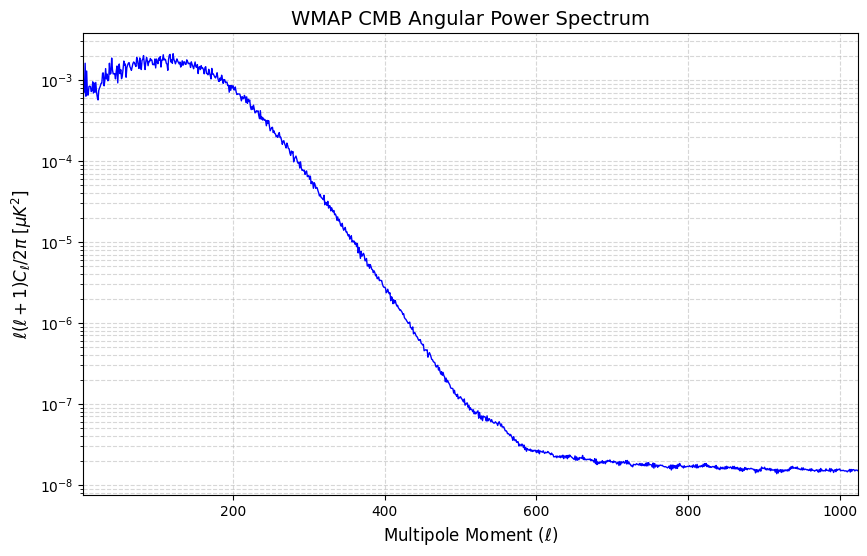

In [ ]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

# Download WMAP data (9-year ILC map)
wmap_map = hp.fitsfunc.read_map(
    'https://lambda.gsfc.nasa.gov/data/map/dr5/dfp/ilc/wmap_ilc_9yr_v5.fits',
    verbose=False
)

# Compute the angular power spectrum
nside = hp.get_nside(wmap_map)
lmax = 2 * nside  # Maximum multipole moment
cl = hp.anafast(wmap_map, lmax=lmax)

# Create multipole array (ℓ values)
ell = np.arange(len(cl))

# Plot the power spectrum using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(ell, ell * (ell + 1) * cl / (2 * np.pi), 'b-', lw=1)
plt.xlabel(r'Multipole Moment ($\ell$)', fontsize=12)
plt.ylabel(r'$\ell(\ell+1)C_\ell / 2\pi$ [$\mu K^2$]', fontsize=12)
plt.title('WMAP CMB Angular Power Spectrum', fontsize=14)
plt.xlim(2, lmax)  # Ignore monopole (ℓ=0) and dipole (ℓ=1)
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.show()